In [18]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [19]:
df = pd.read_csv("C:\\Users\\hp\\Downloads\\medical insurance LR dataset\\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
#check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
#check null
df.isnull().sum()/len(df)*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [22]:
#check duplicates
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [23]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   bool   
 5   smoker_yes        1338 non-null   bool   
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 48.5 KB


In [25]:
# DATA WRANGLING
print(df["age"].unique())
print(df["age"].unique())
print(df["age"].unique())
print(df["bmi"].unique())
print(df["children"].unique())
print(df["charges"].unique())
print(df["sex_male"].unique())
print(df["smoker_yes"].unique())
print(df["region_northwest"].unique())
print(df["region_southeast"].unique())
print(df["region_southwest"].unique())

[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41

In [26]:
import warnings

warnings.simplefilter(action="ignore", category="FutureWarnings")

In [27]:
#data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
# Split
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [30]:
# Train
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
model.intercept_, model.coef_.round(2)

(-11931.219050326681,
 array([ 2.569800e+02,  3.370900e+02,  4.252800e+02, -1.859000e+01,
         2.365113e+04, -3.706800e+02, -6.578600e+02, -8.098000e+02]))

In [32]:
#model evaluation
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [34]:
# Evaluate
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.7835929767120724
MAE: 4181.194473753651
RMSE: 5796.284659276273


In [35]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coefficients)

            Feature   Coefficient
0               age    256.975706
1               bmi    337.092552
2          children    425.278784
3          sex_male    -18.591692
4        smoker_yes  23651.128856
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354


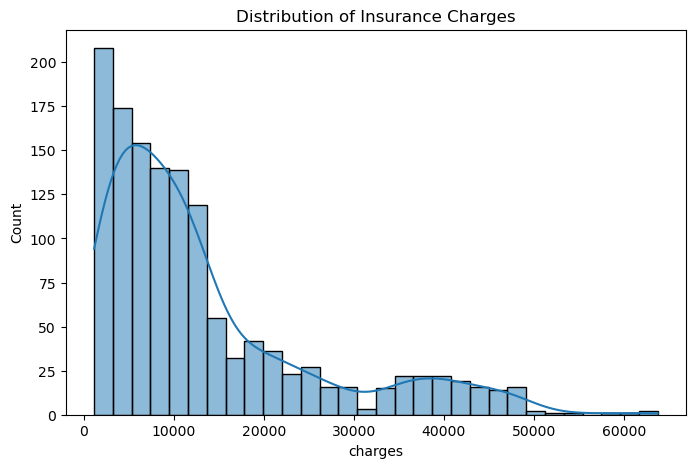

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()

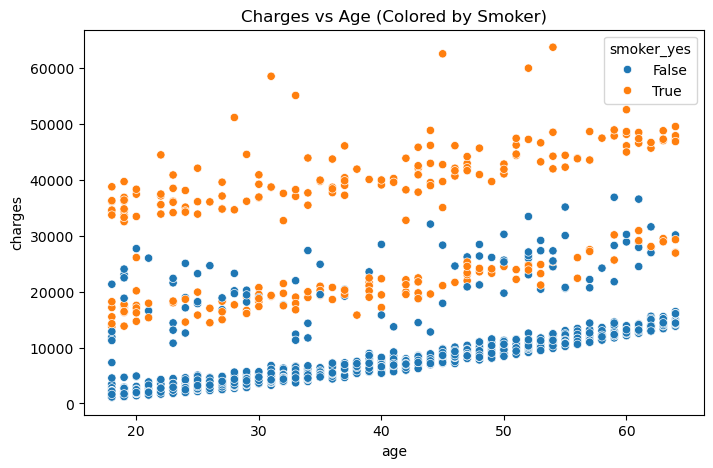

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker_yes')
plt.title("Charges vs Age (Colored by Smoker)")
plt.show()

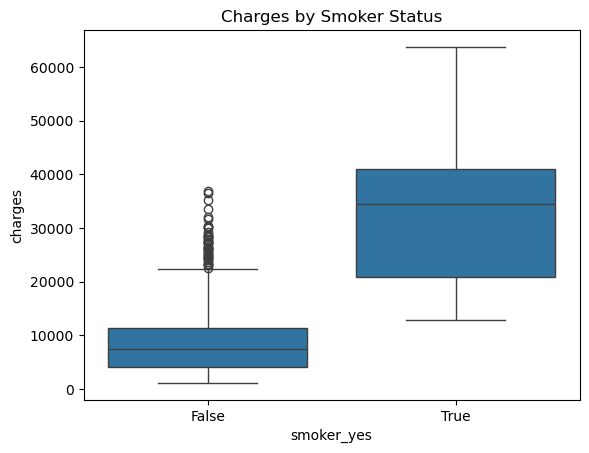

In [38]:
sns.boxplot(x='smoker_yes', y='charges', data=df)
plt.title("Charges by Smoker Status")
plt.show()


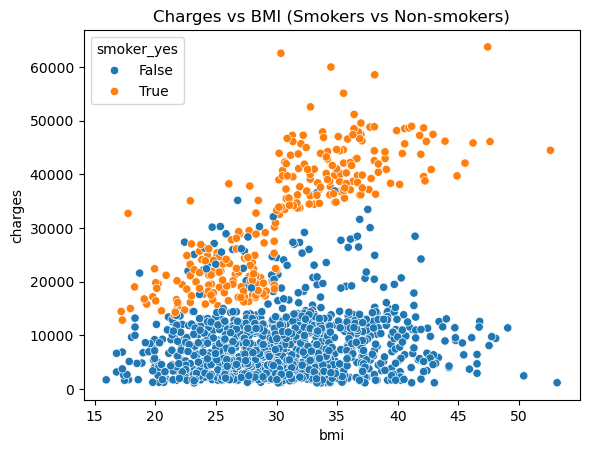

In [39]:
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker_yes')
plt.title("Charges vs BMI (Smokers vs Non-smokers)")
plt.show()
